<a href="https://colab.research.google.com/github/alanfmorato/Analise-de-vendas/blob/main/Series_Temporais_Chocolates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [2]:
chocolate = pd.read_csv('/content/chocolura.csv')

In [3]:
chocolate.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [4]:
chocolate.mes = pd.to_datetime(chocolate.mes)

In [5]:
chocolate['aumento'] = chocolate['vendas'].diff()

In [6]:
chocolate['aceleracao'] = chocolate['aumento'].diff()

In [7]:
chocolate.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


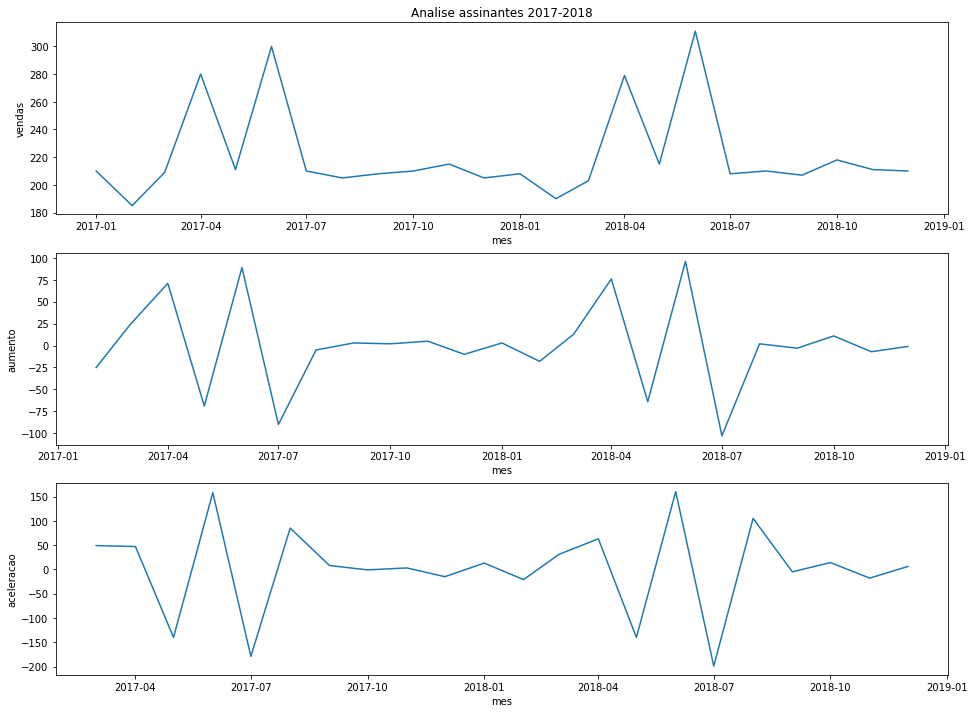

In [8]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise assinantes 2017-2018')
sns.lineplot(data = chocolate, x = 'mes', y = 'vendas');
plt.subplot(3,1,2)
sns.lineplot(data = chocolate, x = 'mes', y = 'aumento');
plt.subplot(3,1,3)
sns.lineplot(data = chocolate, x = 'mes', y = 'aceleracao');
ax = ax

Existem sazonalidades em algumas épocas, como por exemplo março e junho.

In [9]:
vendas_por_dia = pd.read_csv('/content/vendas_por_dia.csv')

In [10]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [11]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()

In [12]:
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [13]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

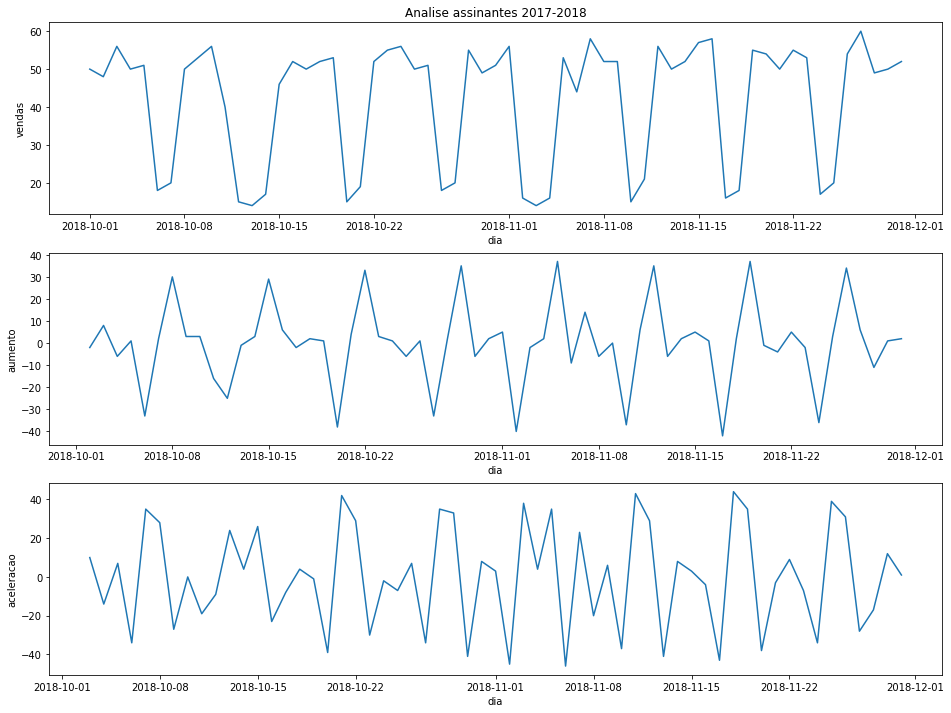

In [14]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise assinantes 2017-2018')
sns.lineplot(data = vendas_por_dia, x = 'dia', y = 'vendas');
plt.subplot(3,1,2)
sns.lineplot(data = vendas_por_dia, x = 'dia', y = 'aumento');
plt.subplot(3,1,3)
sns.lineplot(data = vendas_por_dia, x = 'dia', y = 'aceleracao');
ax = ax

In [15]:
vendas_por_dia['Dia_da_Semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,Dia_da_Semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [16]:
vendas_agrupadas = vendas_por_dia.groupby('Dia_da_Semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-16-5cbcb784c50c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('Dia_da_Semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [17]:
vendas_agrupadas.head()

,vendas,aumento,aceleracao
Dia_da_Semana,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0


Text(0.5, 1.0, 'Correlação de vendas diárias')

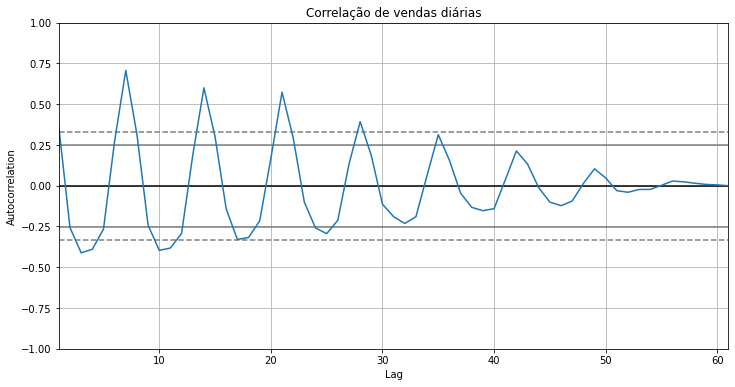

In [18]:
plt.figure(figsize=(12,6))
autocorrelation_plot(vendas_por_dia["vendas"])
plt.title("Correlação de vendas diárias")

Text(0.5, 1.0, 'Correlação do aumento vendas diárias')

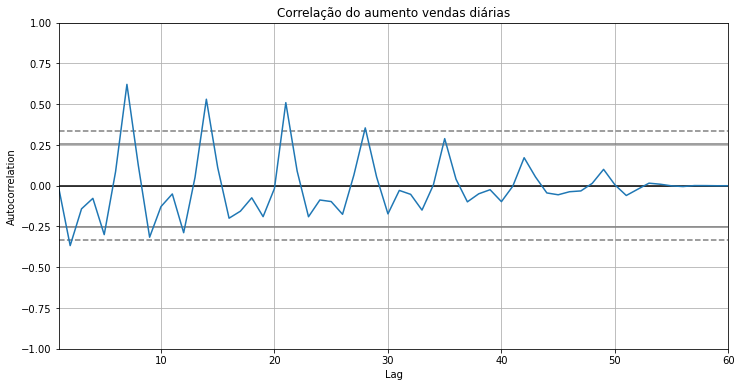

In [22]:
plt.figure(figsize=(12,6))
autocorrelation_plot(vendas_por_dia["aumento"][1:])
plt.title("Correlação do aumento vendas diárias")

Text(0.5, 1.0, 'Correlação da celeracao vendas diárias')

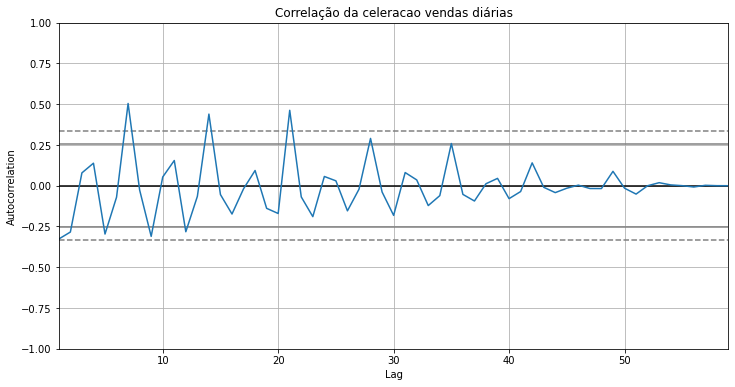

In [23]:
plt.figure(figsize=(12,6))
autocorrelation_plot(vendas_por_dia["aceleracao"][2:])
plt.title("Correlação da celeracao vendas diárias")